In [1]:
import glob
import imageio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import mahotas as mt
from skimage.restoration import estimate_sigma
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pickle
import imageio
import glob
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# different features
box_train_files = glob.glob(r'C:\Users\r04ra18\Desktop\fold\fdata_aksh\TRAIN\box\*')
chevron_train_files = glob.glob(r'C:\Users\r04ra18\Desktop\fold\fdata_aksh\TRAIN\chevron\*')
rounded_train_files = glob.glob(r'C:\Users\r04ra18\Desktop\fold\fdata_aksh\TRAIN\rounded\*')



# images in
box_train_im = [imageio.imread(im) for im in box_train_files]
chevron_train_im = [imageio.imread(im) for im in chevron_train_files]
rounded_train_im = [imageio.imread(im) for im in rounded_train_files]

print(f'Box {len(box_train_im)}\n Chevron {len(chevron_train_im)}\n Rounded {len(rounded_train_im)}\n')

Box 1224
 Chevron 1317
 Rounded 1372



In [3]:
# different features
box_val_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/VAL/box/1/*')
chevron_val_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/VAL/chevron/1/*')
rounded_val_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/VAL/rounded/1/*')



# images in
box_val_im = [imageio.imread(im) for im in box_val_files]
chevron_val_im = [imageio.imread(im) for im in chevron_val_files]
rounded_val_im = [imageio.imread(im) for im in rounded_val_files]

print(f'Box {len(box_val_im)}\n Chevron {len(chevron_val_im)}\n Rounded {len(rounded_val_im)}\n')

Box 100
 Chevron 100
 Rounded 100



In [4]:
# different features
box_test_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/TEST/box/*')
chevron_test_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/TEST/chevron/*')
rounded_test_files = glob.glob('C:/Users/r04ra18/Desktop/fold/fdata_aksh/TEST/rounded/*')



# images in
box_test_im = [imageio.imread(im) for im in box_test_files]
chevron_test_im = [imageio.imread(im) for im in chevron_test_files]
rounded_test_im = [imageio.imread(im) for im in rounded_test_files]

print(f'Box {len(box_test_im)}\n Chevron {len(chevron_test_im)}\n Rounded {len(rounded_test_im)}\n')

Box 22
 Chevron 22
 Rounded 24



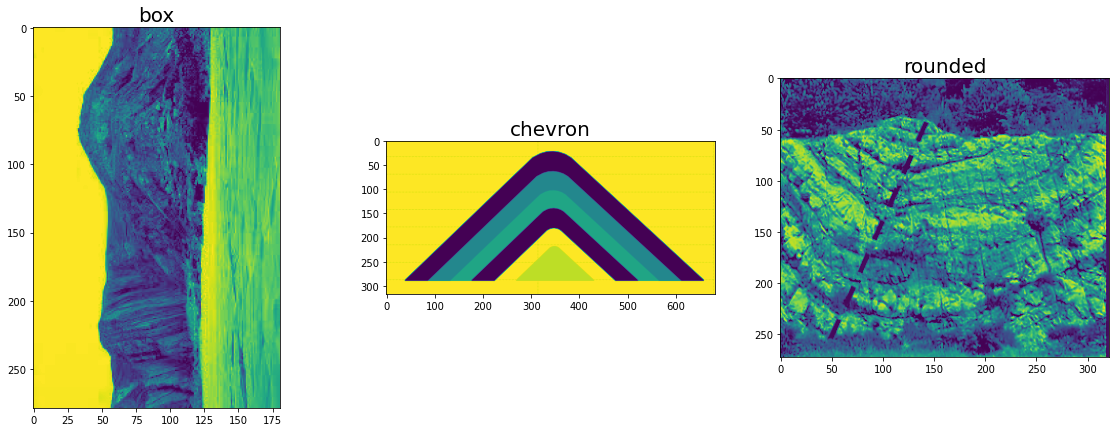

In [5]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(ncols=3, figsize=(20,7))

axs[0].imshow(box_train_im[10][:,:,0])
axs[0].set_title('box', fontsize=20)
axs[1].imshow(chevron_train_im[200][:,:,0])
axs[1].set_title('chevron', fontsize=20)
axs[2].imshow(rounded_train_im[10][:,:,0])
axs[2].set_title('rounded', fontsize=20)

plt.show()
#for im in flat_col_im:
#    print(np.min(np.array(im.tolist())), np.max(np.array(im.tolist())))
    

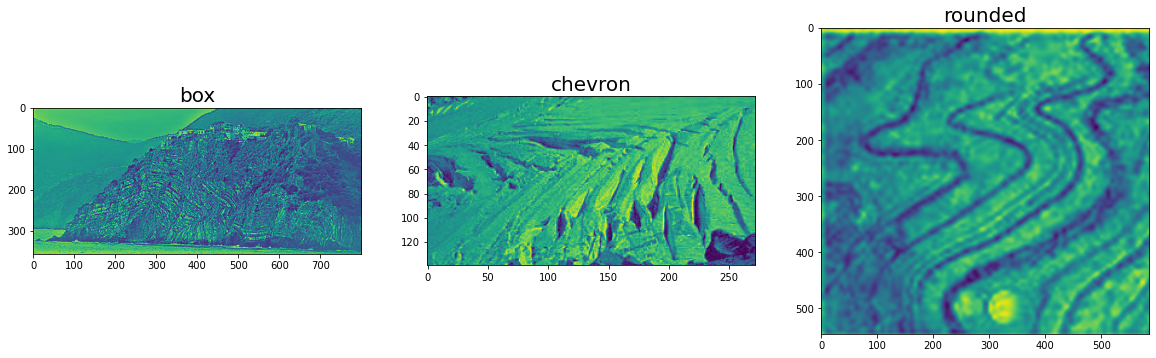

In [6]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(ncols=3, figsize=(20,7))

axs[0].imshow(box_val_im[1][:,:,0])
axs[0].set_title('box', fontsize=20)
axs[1].imshow(chevron_val_im[20][:,:,0])
axs[1].set_title('chevron', fontsize=20)
axs[2].imshow(rounded_val_im[20][:,:,0])
axs[2].set_title('rounded', fontsize=20)

plt.show()
#for im in flat_col_im:
#    print(np.min(np.array(im.tolist())), np.max(np.array(im.tolist())))
    

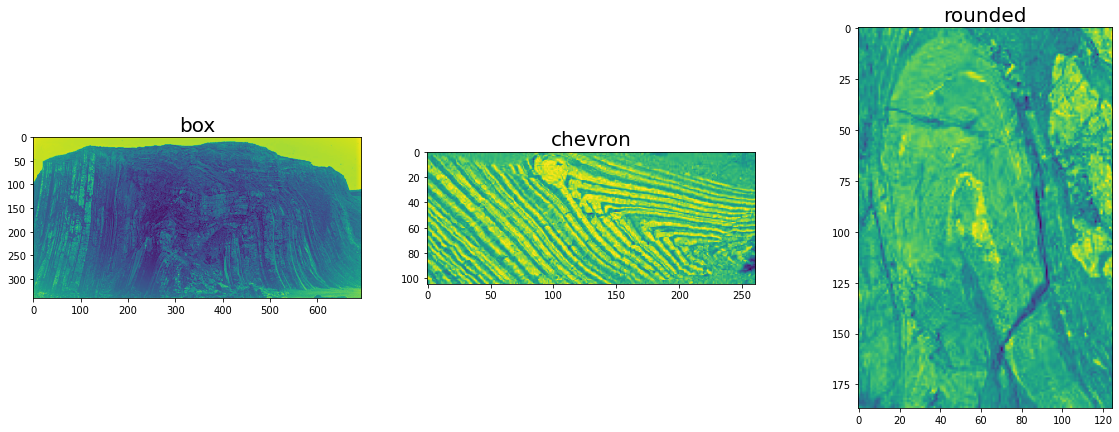

In [7]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(ncols=3, figsize=(20,7))

axs[0].imshow(box_test_im[2][:,:,0])
axs[0].set_title('box', fontsize=20)
axs[1].imshow(chevron_test_im[10][:,:,0])
axs[1].set_title('chevron', fontsize=20)
axs[2].imshow(rounded_test_im[10][:,:,0])
axs[2].set_title('rounded', fontsize=20)

plt.show()
#for im in flat_col_im:
#    print(np.min(np.array(im.tolist())), np.max(np.array(im.tolist())))
    

In [8]:
"""common index error if you use grey scale images array is 2-dimensional, but 3 were indexed"""

ser = [np.array(im.tolist())[:,:,0] for im in box_train_im]

df_train_box = pd.DataFrame()
df_train_box['ampbw'] = pd.Series(ser)
df_train_box['categ'] = 'box'
df_train_box['imsizex'] = [s.shape[0] for s in ser]
df_train_box['imsizey'] = [s.shape[1] for s in ser]

In [9]:
"""common index error if you use grey scale images array is 2-dimensional, but 3 were indexed"""

ser = [np.array(im.tolist())[:,:,0] for im in rounded_train_im]

df_train_rounded = pd.DataFrame()
df_train_rounded['ampbw'] = pd.Series(ser)
df_train_rounded['categ'] = 'rounded'
df_train_rounded['imsizex'] = [s.shape[0] for s in ser]
df_train_rounded['imsizey'] = [s.shape[1] for s in ser]

In [10]:
"""common index error if you use grey scale images array is 2-dimensional, but 3 were indexed"""


ser = [np.array(im.tolist())[:,:,0] for im in chevron_train_im]

df_train_chevron = pd.DataFrame()
df_train_chevron['ampbw'] = pd.Series(ser)
df_train_chevron['categ'] = 'chevron'
df_train_chevron['imsizex'] = [s.shape[0] for s in ser]
df_train_chevron['imsizey'] = [s.shape[1] for s in ser]

In [11]:
df_train = pd.concat([df_train_box, df_train_chevron, df_train_rounded])

In [12]:
df_train_box['categ'].value_counts()

box    1224
Name: categ, dtype: int64

In [13]:
df_train_box['ampbw'].value_counts()

[[224, 223, 223, 223, 224, 224, 224, 223, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 223, 224, 224, 224, 224, 225, 225, 225, 225, 226, 226, 226, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 227, 227, 228, 227, 227, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 226, 226, 226, 226, 226, 226, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 224, 223, 222, 221, 220, ...], [224, 223, 223, 223, 224, 224, 224, 224, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 224, 224, 224, 224, 224, 224, 224, 225, 225, 225, 225, 226, 226, 226, 226, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 227, 227, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 226, 226, 226, 226, 226, 225, 225, 225, 225, 225, 225, 225, 225, 223, 223, 2

In [14]:
df_train_chevron['categ'].value_counts()

chevron    1317
Name: categ, dtype: int64

In [15]:
df_train_rounded['categ'].value_counts()

rounded    1372
Name: categ, dtype: int64

In [16]:
# df_train['categ'].value_counts()

In [17]:
ser = [np.array(im.tolist())[:,:,0] for im in box_val_im]

df_val_box = pd.DataFrame()
df_val_box['ampbw'] = pd.Series(ser)
df_val_box['categ'] = 'box'
df_val_box['imsizex'] = [s.shape[0] for s in ser]
df_val_box['imsizey'] = [s.shape[1] for s in ser]

In [18]:
ser = [np.array(im.tolist())[:,:,0]  for im in chevron_val_im]

df_val_chevron = pd.DataFrame()
df_val_chevron['ampbw'] = pd.Series(ser)
df_val_chevron['categ'] = 'chevron'
df_val_chevron['imsizex'] = [s.shape[0] for s in ser]
df_val_chevron['imsizey'] = [s.shape[1] for s in ser]

In [19]:
ser = [np.array(im.tolist())[:,:,0] for im in rounded_val_im]

df_val_rounded = pd.DataFrame()
df_val_rounded['ampbw'] = pd.Series(ser)
df_val_rounded['categ'] = 'rounded'
df_val_rounded['imsizex'] = [s.shape[0] for s in ser]
df_val_rounded['imsizey'] = [s.shape[1] for s in ser]

In [20]:
df_val = pd.concat([df_val_box, df_val_chevron, df_val_rounded])

In [21]:
type(df_val)

pandas.core.frame.DataFrame

In [22]:
df_val

ampbw    categ  imsizex  \
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      box      356   
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      box      356   
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      box      343   
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      box      346   
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      box      760   
..                                                ...      ...      ...   
95  [[219, 211, 191, 181, 211, 202, 172, 208, 230,...  rounded      188   
96  [[101, 106, 103, 106, 108, 109, 104, 76, 75, 9...  rounded      161   
97  [[177, 172, 166, 159, 155, 154, 154, 155, 143,...  rounded      168   
98  [[165, 180, 187, 170, 103, 151, 71, 103, 137, ...  rounded      194   
99  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      960   

    imsizey  
0       800  
1       800  
2       758  
3       785  
4       698  
..      ...  
95      268  
96      204  
97      299  
98      259  
99      720  

[300 rows x 4 columns]

In [23]:
df_val_ = pd.DataFrame(df_val)

In [24]:
type(df_val_)

pandas.core.frame.DataFrame

In [25]:
df_val_box['categ'].value_counts()

box    100
Name: categ, dtype: int64

In [26]:
# df_X_train = pd.concat([X_box_train, X_chevron_train, X_rounded_train], ignore_index=True)
# df_X_ = pd.concat([X_box_, X_chevron_, X_rounded_], ignore_index=True)

# df_y_train = pd.DataFrame(pd.concat([y_box_train, y_chevron_train, y_rounded_train], ignore_index=True))
# df_y_ = pd.DataFrame(pd.concat([y_box_, y_chevron_, y_rounded_], ignore_index=True))

In [27]:
df_val_chevron['categ'].value_counts()

chevron    100
Name: categ, dtype: int64

In [28]:
df_val_rounded['categ'].value_counts()

rounded    100
Name: categ, dtype: int64

In [29]:
df_val['categ'].value_counts()

box        100
chevron    100
rounded    100
Name: categ, dtype: int64

In [30]:
ser = [np.array(im.tolist())[:,:,0] for im in box_test_im]

df_test_box = pd.DataFrame()
df_test_box['ampbw'] = pd.Series(ser)
df_test_box['categ'] = 'box'
df_test_box['imsizex'] = [s.shape[0] for s in ser]
df_test_box['imsizey'] = [s.shape[1] for s in ser]

In [31]:
ser = [np.array(im.tolist())[:,:,0] for im in chevron_test_im]

df_test_chevron = pd.DataFrame()
df_test_chevron['ampbw'] = pd.Series(ser)
df_test_chevron['categ'] = 'chevron'
df_test_chevron['imsizex'] = [s.shape[0] for s in ser]
df_test_chevron['imsizey'] = [s.shape[1] for s in ser]


In [32]:
ser = [np.array(im.tolist())[:,:,0] for im in rounded_test_im]

df_test_rounded = pd.DataFrame()
df_test_rounded['ampbw'] = pd.Series(ser)
df_test_rounded['categ'] = 'rounded'
df_test_rounded['imsizex'] = [s.shape[0] for s in ser]
df_test_rounded['imsizey'] = [s.shape[1] for s in ser]


In [33]:
df_test = pd.concat([df_test_box, df_test_chevron, df_test_rounded])

In [34]:
df_test_box['categ'].value_counts()

box    22
Name: categ, dtype: int64

In [35]:
df_test_chevron['categ'].value_counts()

chevron    22
Name: categ, dtype: int64

In [36]:
df_test_rounded['categ'].value_counts()

rounded    24
Name: categ, dtype: int64

In [37]:
df_test['categ'].value_counts()

rounded    24
box        22
chevron    22
Name: categ, dtype: int64

In [38]:
df_train

ampbw    categ  imsizex  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...      box      356   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...      box      368   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...      box      368   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      box      375   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      box      442   
...                                                 ...      ...      ...   
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   

      imsizey  
0         800  
1         617  
2         617  
3         480  
4         834  
...       ...  
1367      256  
1368      256  
1369      256  
1370      256  
1371      256  

[3913 rows x 4 columns]

In [39]:
df_val

ampbw    categ  imsizex  \
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      box      356   
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      box      356   
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      box      343   
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      box      346   
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      box      760   
..                                                ...      ...      ...   
95  [[219, 211, 191, 181, 211, 202, 172, 208, 230,...  rounded      188   
96  [[101, 106, 103, 106, 108, 109, 104, 76, 75, 9...  rounded      161   
97  [[177, 172, 166, 159, 155, 154, 154, 155, 143,...  rounded      168   
98  [[165, 180, 187, 170, 103, 151, 71, 103, 137, ...  rounded      194   
99  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      960   

    imsizey  
0       800  
1       800  
2       758  
3       785  
4       698  
..      ...  
95      268  
96      204  
97      299  
98      259  
99      720  

[300 rows x 4 columns]

In [40]:
df_test

ampbw    categ  imsizex  \
0   [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      box      215   
1   [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      box      181   
2   [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      box      341   
3   [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      box      366   
4   [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      box      215   
..                                                ...      ...      ...   
19  [[10, 10, 10, 11, 11, 11, 12, 12, 11, 11, 11, ...  rounded      161   
20  [[217, 212, 216, 196, 202, 195, 216, 224, 213,...  rounded      194   
21  [[62, 62, 43, 28, 38, 67, 111, 153, 143, 144, ...  rounded      408   
22  [[130, 160, 201, 207, 213, 222, 213, 217, 206,...  rounded     2340   
23  [[100, 93, 89, 91, 96, 98, 99, 101, 123, 116, ...  rounded      433   

    imsizey  
0       377  
1       279  
2       694  
3       892  
4       377  
..      ...  
19      280  
20      259  
21      612  
22     4160  
23      949  

[68 rows x 4 columns]

In [41]:
type(df_test)

pandas.core.frame.DataFrame

In [42]:
# # split the data into train and test

# from sklearn.model_selection import train_test_split

# # Make X and y
# X_chevron_train, X_chevron_, y_chevron_train, y_chevron_ = \
#     train_test_split(df_train_chevron[['ampbw','imsizex','imsizey']],
#                      df_train_chevron['categ'], test_size=, random_state=42)

# # X_rounded_train, X_rounded_, y_rounded_train, y_rounded_ = \
# #     train_test_split(df_rounded[['ampbw','imsizex','imsizey']],
# #                      df_rounded['categ'], test_size=0.2, random_state=42)

In [43]:
# # split the data into train and test

# from sklearn.model_selection import train_test_split

# # Make X and y
# X_box_train, X_box_, y_box_train, y_box_ = \
#     train_test_split(df_box[['ampbw','imsizex','imsizey']],
#                      df_box['categ'], test_size=0.2, random_state=42)

# X_chevron_train, X_chevron_, y_chevron_train, y_chevron_ = \
#     train_test_split(df_chevron[['ampbw','imsizex','imsizey']],
#                      df_chevron['categ'], test_size=0.2, random_state=42)

# X_rounded_train, X_rounded_, y_rounded_train, y_rounded_ = \
#     train_test_split(df_rounded[['ampbw','imsizex','imsizey']],
#                      df_rounded['categ'], test_size=0.2, random_state=42)

In [44]:
# print(type(X_df_train))
# print(type(y_df_train))

In [45]:
# print(type(X_df_val))
# print(type(y_df_val))

In [46]:
# print(type(X_df_test))
# print(type(y_df_test))

In [47]:
# X_df_val.to_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_X_val.pickle")

In [48]:
# X_df_test.to_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_X_test.pickle")

In [49]:
# with open('C:/Users/r04ra18/Desktop/pickles_files/df_X_train.pickle', 'bw') as f:
#     pickle.dump(X_df_train, f)

In [50]:
# X_df_train.to_pickle("C:/Users/r04ra18/Desktop/pickles_files/df_X_train.pickle", protocol=protocol)

In [51]:
# X_df_test.to_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_test.csv")
# X_df_val.to_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_val.csv")
# X_df_train.to_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_train.csv")

In [52]:
# y_df_train.to_csv(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_train.csv")
# y_df_val.to_csv(r'C:\Users\r04ra18\Desktop\pickles_files\\df_y_val.csv')
# y_df_test.to_csv(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_test.csv")

In [53]:
# y_df_train.to_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_train.pickle")
# y_df_val.to_pickle(r'C:\Users\r04ra18\Desktop\pickles_files\\df_y_val.pickle')
# y_df_test.to_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_test.pickle")

In [54]:
import glob
import imageio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import mahotas as mt
from skimage.restoration import estimate_sigma
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pickle

In [55]:
# X_train = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_train.csv")
# X_val = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_val.csv")
# X_test = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_X_test.csv")


# y_train = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_y_train.csv")
# y_val = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_y_val.csv")
# y_test = pd.read_csv("C:/Users/r04ra18/Desktop/pickles_files//df_y_test.csv")


In [56]:
# X_df_train.head(10)

In [57]:
# X_df_val.head(10)

In [58]:
# X_df_test.head(10)

In [59]:
# type(y_df_train)

In [60]:
# with open('C:/Users/r04ra18/Desktop/pickles_files/df_X_train.pickle', 'bw') as f:
#     pickl(X_df_train, f)

In [61]:
# X_train = pd.read_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_X_train.pickle")

In [62]:
# X_val = pd.read_pickle(r'C:\Users\r04ra18\Desktop\pickles_files\\df_X_val.pickle')
# X_test = pd.read_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_X_test.pickle")


# y_train = pd.read_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_train.pickle")
# y_val = pd.read_pickle(r'C:\Users\r04ra18\Desktop\pickles_files\\df_y_val.pickle')
# y_test = pd.read_pickle(r"C:\Users\r04ra18\Desktop\pickles_files\\df_y_test.pickle")

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [64]:
# X_df_train['ampbw']

In [65]:
df_train_box

ampbw categ  imsizex  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...   box      356   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...   box      368   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...   box      368   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   box      375   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      442   
...                                                 ...   ...      ...   
1219  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   box      256   
1220  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1221  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1222  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1223  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   

      imsizey  
0         800  
1         617  
2         617  
3         480  
4         834  
...       ...  
1219      256  
1220      256  
1221      256  
1222      256  
1223      256  

[1224 rows x 4 columns]

In [66]:
# Training data

imgs = df_train_box['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))

df_train_box['edge'] = imgs_filt

In [67]:
df_train_box

ampbw categ  imsizex  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...   box      356   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...   box      368   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...   box      368   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   box      375   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      442   
...                                                 ...   ...      ...   
1219  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   box      256   
1220  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1221  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1222  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   
1223  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   box      256   

      imsizey                                               edge  
0         800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         480  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4         834  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...       ...                                                ...  
1219      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1220      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1221      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1222      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1223      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[1224 rows x 5 columns]

In [68]:
df_train_chevron

ampbw    categ  imsizex  \
0     [[188, 234, 198, 207, 80, 75, 84, 176, 181, 82...  chevron      389   
1     [[83, 70, 63, 64, 54, 49, 71, 63, 33, 56, 27, ...  chevron      291   
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      633   
3     [[165, 165, 166, 166, 166, 167, 168, 169, 169,...  chevron      168   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      388   
...                                                 ...      ...      ...   
1312  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      256   
1313  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      256   
1314  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      256   
1315  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  chevron      256   
1316  [[255, 232, 216, 243, 255, 230, 219, 254, 217,...  chevron      256   

      imsizey  
0         686  
1         530  
2         253  
3          65  
4         420  
...       ...  
1312      256  
1313      256  
1314      256  
1315      256  
1316      256  

[1317 rows x 4 columns]

In [69]:
# Training data

imgs = df_train_chevron['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))

df_train_chevron['edge'] = imgs_filt

In [70]:
# Training data

imgs = df_train_rounded['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    #im = im.reshape(x, y, 3)
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))

df_train_rounded['edge'] = imgs_filt

In [71]:
df_val_box

ampbw categ  imsizex  imsizey
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...   box      356      800
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...   box      356      800
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...   box      343      758
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...   box      346      785
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...   box      760      698
..                                                ...   ...      ...      ...
95  [[107, 117, 115, 105, 129, 155, 135, 134, 144,...   box      225      300
96  [[249, 192, 139, 173, 195, 165, 205, 228, 210,...   box      300      225
97  [[246, 243, 240, 240, 241, 241, 241, 239, 238,...   box      225      300
98  [[177, 180, 178, 172, 185, 199, 186, 193, 193,...   box      225      300
99  [[157, 156, 155, 155, 156, 155, 154, 153, 153,...   box      225      300

[100 rows x 4 columns]

In [72]:
# Validation data

imgs = df_val_box['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x,y  = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))
    
df_val_box['edge'] = imgs_filt

In [73]:
# Validation data

imgs = df_val_rounded['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x,y  = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))
    
df_val_rounded['edge'] = imgs_filt

In [74]:
df_val_chevron

ampbw    categ  imsizex  \
0   [[83, 85, 88, 91, 93, 95, 98, 100, 101, 101, 1...  chevron      168   
1   [[50, 12, 169, 185, 187, 184, 190, 184, 185, 1...  chevron      160   
2   [[165, 165, 166, 166, 166, 167, 168, 169, 169,...  chevron      168   
3   [[113, 113, 112, 111, 110, 110, 109, 109, 107,...  chevron      177   
4   [[255, 255, 255, 255, 251, 248, 248, 251, 250,...  chevron      169   
..                                                ...      ...      ...   
95  [[129, 157, 149, 124, 138, 156, 149, 161, 111,...  chevron      204   
96  [[132, 157, 157, 136, 89, 90, 139, 137, 125, 1...  chevron      259   
97  [[225, 217, 235, 219, 227, 217, 207, 239, 227,...  chevron      195   
98  [[48, 45, 46, 37, 41, 36, 40, 39, 38, 32, 28, ...  chevron       83   
99  [[228, 226, 231, 238, 234, 224, 227, 236, 219,...  chevron      200   

    imsizey  
0       162  
1        77  
2        65  
3       284  
4       298  
..      ...  
95      165  
96      194  
97      258  
98      201  
99      240  

[100 rows x 4 columns]

In [75]:
# Validation data

imgs = df_val_chevron['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x,y  = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))
    
df_val_chevron['edge'] = imgs_filt

In [76]:
df_train = pd.concat([df_train_box, df_train_chevron, df_train_rounded])

In [77]:
df_train

ampbw    categ  imsizex  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...      box      356   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...      box      368   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...      box      368   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      box      375   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      box      442   
...                                                 ...      ...      ...   
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   

      imsizey                                               edge  
0         800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         480  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4         834  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...       ...                                                ...  
1367      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1368      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1369      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1370      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1371      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[3913 rows x 5 columns]

In [78]:
"""
Applying Gabor filter
"""
kernel = cv2.getGaborKernel((11, 11), 4, 11, 11, 1, 1, cv2.CV_32F)
#kernel /= math.sqrt((kernel * kernel).sum())
kernel /= np.sqrt((kernel * kernel).sum())

gabor_filt = list()
imgs = df_train['ampbw']

for im in imgs:
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
    gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
df_train['gabor'] = gabor_filt

In [79]:
df_train

ampbw    categ  imsizex  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...      box      356   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...      box      368   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...      box      368   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      box      375   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      box      442   
...                                                 ...      ...      ...   
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      256   

      imsizey                                               edge  \
0         800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2         617  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3         480  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4         834  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...       ...                                                ...   
1367      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1368      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1369      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1370      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1371      256  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                  gabor  
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
...                                                 ...  
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  

[3913 rows x 6 columns]

In [80]:
df_val = pd.concat([df_val_box, df_val_chevron, df_val_rounded])

In [81]:
df_val

ampbw    categ  imsizex  \
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      box      356   
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      box      356   
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      box      343   
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      box      346   
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      box      760   
..                                                ...      ...      ...   
95  [[219, 211, 191, 181, 211, 202, 172, 208, 230,...  rounded      188   
96  [[101, 106, 103, 106, 108, 109, 104, 76, 75, 9...  rounded      161   
97  [[177, 172, 166, 159, 155, 154, 154, 155, 143,...  rounded      168   
98  [[165, 180, 187, 170, 103, 151, 71, 103, 137, ...  rounded      194   
99  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      960   

    imsizey                                               edge  
0       800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2       758  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3       785  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4       698  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
..      ...                                                ...  
95      268  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
96      204  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
97      299  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
98      259  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
99      720  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[300 rows x 5 columns]

In [82]:
gabor_filt = list()
imgs = df_val['ampbw']

for im in imgs:
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
    gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
df_val['gabor'] = gabor_filt


In [83]:
df_val

ampbw    categ  imsizex  \
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      box      356   
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      box      356   
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      box      343   
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      box      346   
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      box      760   
..                                                ...      ...      ...   
95  [[219, 211, 191, 181, 211, 202, 172, 208, 230,...  rounded      188   
96  [[101, 106, 103, 106, 108, 109, 104, 76, 75, 9...  rounded      161   
97  [[177, 172, 166, 159, 155, 154, 154, 155, 143,...  rounded      168   
98  [[165, 180, 187, 170, 103, 151, 71, 103, 137, ...  rounded      194   
99  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  rounded      960   

    imsizey                                               edge  \
0       800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1       800  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2       758  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3       785  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4       698  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
..      ...                                                ...   
95      268  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
96      204  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
97      299  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
98      259  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
99      720  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                gabor  
0   [[231, 231, 231, 232, 233, 233, 234, 235, 235,...  
1   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2   [[255, 255, 255, 255, 255, 255, 255, 249, 239,...  
3   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4   [[196, 196, 196, 196, 196, 196, 196, 196, 196,...  
..                                                ...  
95  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
96  [[142, 143, 139, 136, 134, 133, 133, 134, 135,...  
97  [[233, 233, 232, 230, 228, 225, 222, 218, 214,...  
98  [[255, 255, 255, 255, 255, 232, 211, 190, 189,...  
99  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  

[300 rows x 6 columns]

In [84]:
df_test

ampbw    categ  imsizex  \
0   [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      box      215   
1   [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      box      181   
2   [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      box      341   
3   [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      box      366   
4   [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      box      215   
..                                                ...      ...      ...   
19  [[10, 10, 10, 11, 11, 11, 12, 12, 11, 11, 11, ...  rounded      161   
20  [[217, 212, 216, 196, 202, 195, 216, 224, 213,...  rounded      194   
21  [[62, 62, 43, 28, 38, 67, 111, 153, 143, 144, ...  rounded      408   
22  [[130, 160, 201, 207, 213, 222, 213, 217, 206,...  rounded     2340   
23  [[100, 93, 89, 91, 96, 98, 99, 101, 123, 116, ...  rounded      433   

    imsizey  
0       377  
1       279  
2       694  
3       892  
4       377  
..      ...  
19      280  
20      259  
21      612  
22     4160  
23      949  

[68 rows x 4 columns]

In [85]:
# Testing data

imgs = df_test['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))
    
df_test['edge'] = imgs_filt


In [86]:
df_test

ampbw    categ  imsizex  \
0   [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      box      215   
1   [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      box      181   
2   [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      box      341   
3   [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      box      366   
4   [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      box      215   
..                                                ...      ...      ...   
19  [[10, 10, 10, 11, 11, 11, 12, 12, 11, 11, 11, ...  rounded      161   
20  [[217, 212, 216, 196, 202, 195, 216, 224, 213,...  rounded      194   
21  [[62, 62, 43, 28, 38, 67, 111, 153, 143, 144, ...  rounded      408   
22  [[130, 160, 201, 207, 213, 222, 213, 217, 206,...  rounded     2340   
23  [[100, 93, 89, 91, 96, 98, 99, 101, 123, 116, ...  rounded      433   

    imsizey                                               edge  
0       377  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       279  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2       694  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3       892  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4       377  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
..      ...                                                ...  
19      280  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
20      259  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
21      612  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
22     4160  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
23      949  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[68 rows x 5 columns]

In [87]:
gabor_filt = list()
imgs = df_test['ampbw']

for im in imgs:
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
    gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
df_test['gabor'] = gabor_filt


In [88]:
df_test

ampbw    categ  imsizex  \
0   [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      box      215   
1   [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      box      181   
2   [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      box      341   
3   [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      box      366   
4   [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      box      215   
..                                                ...      ...      ...   
19  [[10, 10, 10, 11, 11, 11, 12, 12, 11, 11, 11, ...  rounded      161   
20  [[217, 212, 216, 196, 202, 195, 216, 224, 213,...  rounded      194   
21  [[62, 62, 43, 28, 38, 67, 111, 153, 143, 144, ...  rounded      408   
22  [[130, 160, 201, 207, 213, 222, 213, 217, 206,...  rounded     2340   
23  [[100, 93, 89, 91, 96, 98, 99, 101, 123, 116, ...  rounded      433   

    imsizey                                               edge  \
0       377  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1       279  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2       694  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3       892  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4       377  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
..      ...                                                ...   
19      280  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
20      259  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
21      612  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
22     4160  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
23      949  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                gabor  
0   [[251, 251, 251, 251, 251, 252, 252, 252, 253,...  
1   [[0, 0, 0, 0, 0, 0, 0, 3, 13, 18, 16, 20, 22, ...  
2   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
..                                                ...  
19  [[12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, ...  
20  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
21  [[55, 62, 79, 101, 124, 146, 170, 187, 195, 19...  
22  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
23  [[105, 107, 113, 127, 141, 151, 161, 167, 171,...  

[68 rows x 6 columns]

In [89]:
X_train, y_train = (df_train[['ampbw','imsizex','imsizey', 'edge', 'gabor']],
                     df_train[['categ']])

In [90]:

X_val, y_val = (df_val[['ampbw','imsizex','imsizey', 'edge', 'gabor']],
                     df_val[['categ']])

X_test, y_test = (df_test[['ampbw','imsizex','imsizey', 'edge', 'gabor']],
                     df_test[['categ']])

In [91]:
X_train

ampbw  imsizex  imsizey  \
0     [[224, 223, 223, 223, 224, 224, 224, 223, 225,...      356      800   
1     [[220, 222, 223, 224, 226, 226, 227, 227, 228,...      368      617   
2     [[252, 252, 252, 255, 255, 255, 255, 255, 255,...      368      617   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      375      480   
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      442      834   
...                                                 ...      ...      ...   
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      256      256   
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      256      256   
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      256      256   
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      256      256   
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      256      256   

                                                   edge  \
0     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                 ...   
1367  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1368  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1369  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1370  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1371  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                  gabor  
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
...                                                 ...  
1367  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1368  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1369  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1370  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1371  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  

[3913 rows x 5 columns]

In [92]:
y_train

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

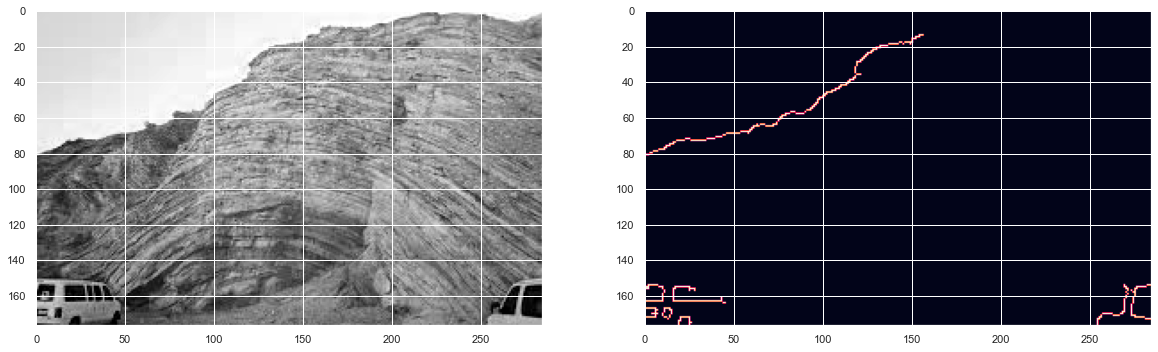

In [93]:
from matplotlib import pyplot as plt

i = 200

#meanfilt_data = cv2.fastNlMeansDenoising(images[2],None,50,50,7)
#meanfilt_data = cv2.
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_train['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_train['edge'].iloc[i])
plt.show()

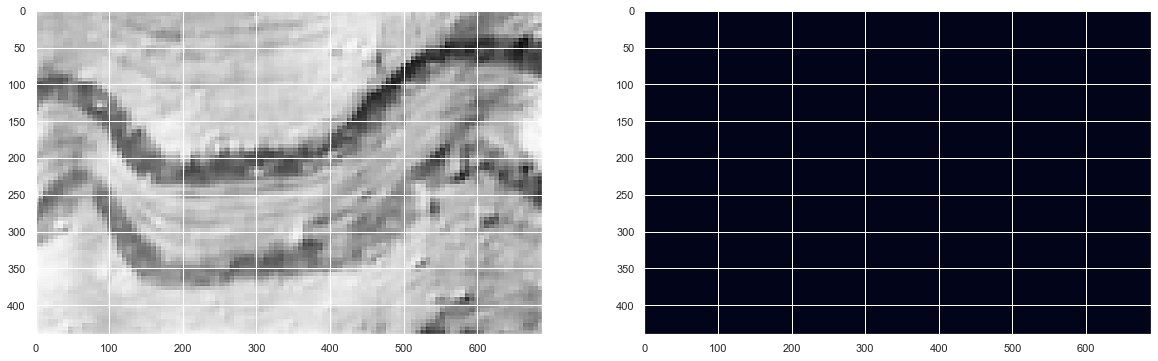

In [94]:
from matplotlib import pyplot as plt

i = 15

#meanfilt_data = cv2.fastNlMeansDenoising(images[2],None,50,50,7)
#meanfilt_data = cv2.
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_test['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_test['edge'].iloc[i])
plt.show()

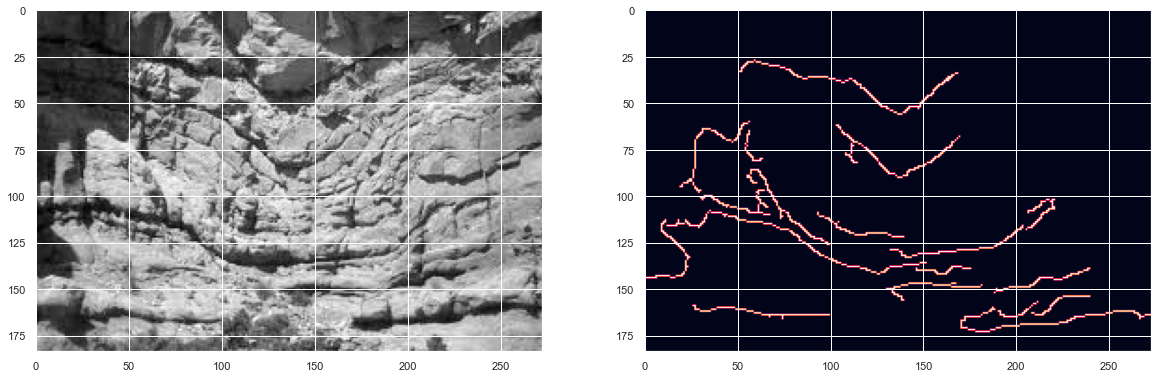

In [95]:
from matplotlib import pyplot as plt

i = 70

#meanfilt_data = cv2.fastNlMeansDenoising(images[2],None,50,50,7)
#meanfilt_data = cv2.
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_val['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_val['edge'].iloc[i])
plt.show()

In [96]:
# """
# Applying Gabor filter
# """
# kernel = cv2.getGaborKernel((11, 11), 4, 11, 11, 1, 1, cv2.CV_32F)
# #kernel /= math.sqrt((kernel * kernel).sum())
# kernel /= np.sqrt((kernel * kernel).sum())



# gabor_filt = list()
# imgs = X_val['ampbw']

# for im in imgs:
#     #x,y = im.shape
#     #im = im.repeat(3).reshape(im.shape, im.shape, 3).astype(np.uint8) 
#     gabor_filt.append(cv2.filter2D(im, -1, kernel))
    
    
# X_val['gabor'] = gabor_filt

In [97]:
# """
# Applying Gabor filter
# """
# kernel = cv2.getGaborKernel((11, 11), 4, 11, 11, 1, 1, cv2.CV_32F)
# #kernel /= math.sqrt((kernel * kernel).sum())
# kernel /= np.sqrt((kernel * kernel).sum())

# gabor_filt = list()
# imgs = X_train['ampbw']

# for im in imgs:
#     x, y = im.shape
#     im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
#     gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
# X_train['gabor'] = gabor_filt

# gabor_filt = list()
# imgs = X_test['ampbw']

# for im in imgs:
#     x, y = im.shape
#     im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
#     gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
# X_test['gabor'] = gabor_filt



# gabor_filt = list()
# imgs = X_val['ampbw']

# for im in imgs:
#     x = im.shape
#     y = im.shape
#     #im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
#     gabor_filt.append(cv2.filter2D(im, -1, kernel))
    
# X_val['gabor'] = gabor_filt


In [98]:
X_val.head()

ampbw  imsizex  imsizey  \
0  [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      356      800   
1  [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      356      800   
2  [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      343      758   
3  [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      346      785   
4  [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      760      698   

                                                edge  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                               gabor  
0  [[231, 231, 231, 232, 233, 233, 234, 235, 235,...  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2  [[255, 255, 255, 255, 255, 255, 255, 249, 239,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[196, 196, 196, 196, 196, 196, 196, 196, 196,...

In [99]:
X_test.head()

ampbw  imsizex  imsizey  \
0  [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      215      377   
1  [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      181      279   
2  [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      341      694   
3  [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      366      892   
4  [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      215      377   

                                                edge  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                               gabor  
0  [[251, 251, 251, 251, 251, 252, 252, 252, 253,...  
1  [[0, 0, 0, 0, 0, 0, 0, 3, 13, 18, 16, 20, 22, ...  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...

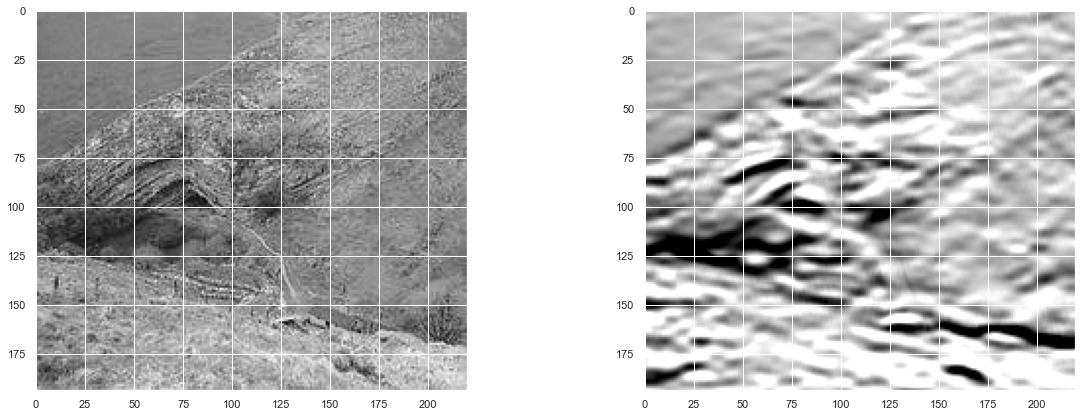

In [100]:
i=150
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_train['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_train['gabor'].iloc[i], cmap='gray')

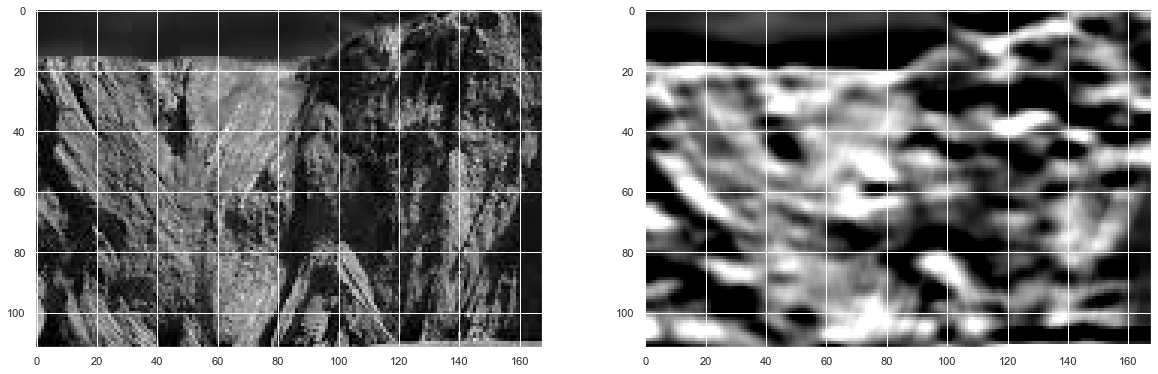

In [101]:
i=150
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_val['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_val['gabor'].iloc[i], cmap='gray')

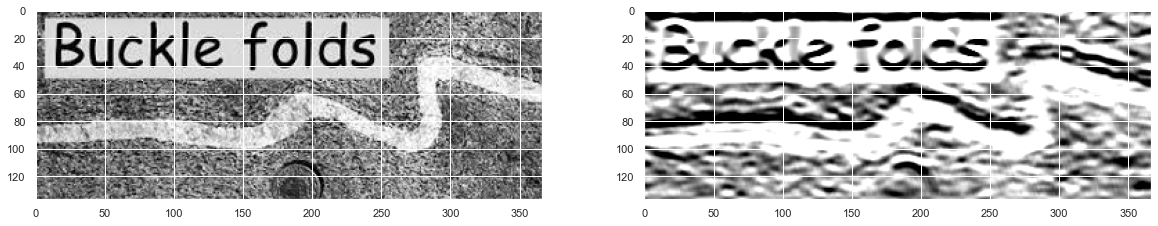

In [102]:
i=50
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_test['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_test['gabor'].iloc[i], cmap='gray')

In [103]:
X_train.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_train.pickle")
X_val.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_val.pickle")
X_test.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_test.pickle")

In [104]:
y_test

categ
0       box
1       box
2       box
3       box
4       box
..      ...
19  rounded
20  rounded
21  rounded
22  rounded
23  rounded

[68 rows x 1 columns]

In [105]:
y_train.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_train.pickle")
y_val.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_val.pickle")
y_test.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_test.pickle")

In [106]:
X_train_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_train.pickle")
X_test_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_test.pickle")
X_val_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_Xwfilt_val.pickle")

y_train_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_train.pickle")
y_val_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_val.pickle")
y_test_data = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\df_y_test.pickle")

In [107]:
X_train_data.head(20)

ampbw  imsizex  imsizey  \
0   [[224, 223, 223, 223, 224, 224, 224, 223, 225,...      356      800   
1   [[220, 222, 223, 224, 226, 226, 227, 227, 228,...      368      617   
2   [[252, 252, 252, 255, 255, 255, 255, 255, 255,...      368      617   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      375      480   
4   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      442      834   
5   [[166, 164, 161, 162, 164, 167, 173, 177, 179,...     1757     2601   
6   [[246, 243, 240, 240, 241, 241, 241, 239, 238,...      225      300   
7   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      440      689   
8   [[157, 156, 155, 155, 156, 155, 154, 153, 153,...      225      300   
9   [[55, 21, 55, 39, 51, 48, 64, 139, 173, 193, 4...      279      181   
10  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      279      181   
11  [[187, 187, 186, 184, 182, 181, 180, 179, 179,...      141      357   
12  [[26, 23, 24, 27, 27, 24, 24, 27, 24, 30, 33, ...      184      273   
13  [[43, 128, 188, 232, 255, 192, 172, 238, 238, ...      276      182   
14  [[2, 3, 4, 4, 5, 7, 8, 7, 8, 10, 10, 9, 4, 8, ...      182      276   
15  [[185, 155, 153, 154, 143, 146, 144, 129, 131,...      103      249   
16  [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      343      758   
17  [[81, 226, 227, 81, 80, 80, 231, 232, 80, 232,...      760      698   
18  [[255, 236, 174, 255, 236, 135, 147, 142, 249,...      716      641   
19  [[220, 226, 234, 239, 219, 227, 234, 83, 128, ...      123      220   

                                                 edge  \
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
5   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
6   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
7   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
8   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, ...   
10  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
11  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
12  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
13  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
14  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
16  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
17  [[0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, ...   
18  [[0, 255, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0,...   
19  [[0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, ...   

                                                gabor  
0   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
5   [[219, 219, 221, 223, 227, 232, 237, 242, 248,...  
6   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
7   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
8   [[211, 211, 210, 209, 208, 206, 205, 204, 203,...  
9   [[0, 0, 0, 12, 48, 80, 96, 104, 101, 96, 84, 7...  
10  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
11  [[255, 255, 255, 255, 255, 254, 253, 253, 252,...  
12  [[36, 36, 36, 35, 37, 39, 39, 39, 38, 36, 35, ...  
13  [[225, 221, 224, 236, 255, 255, 255, 255, 255,...  
14  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,...  
15  [[168, 165, 162, 159, 156, 153, 148, 144, 141,...  
16  [[255, 255, 255, 255, 255, 255, 255, 249, 239,...  
17  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
18  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
19  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...

In [108]:
X_test_data.head(20)

ampbw  imsizex  imsizey  \
0   [[180, 180, 179, 179, 179, 179, 179, 179, 178,...      215      377   
1   [[22, 24, 10, 4, 8, 0, 7, 13, 3, 5, 13, 12, 15...      181      279   
2   [[240, 239, 238, 237, 237, 237, 236, 235, 235,...      341      694   
3   [[187, 188, 188, 187, 187, 186, 186, 185, 185,...      366      892   
4   [[183, 183, 183, 184, 184, 184, 184, 184, 185,...      215      377   
5   [[155, 147, 143, 144, 144, 143, 146, 151, 151,...     1757     2601   
6   [[175, 178, 189, 190, 170, 176, 187, 2, 121, 1...      123      220   
7   [[0, 16, 0, 52, 76, 1, 43, 39, 84, 5, 1, 51, 3...      184      275   
8   [[58, 57, 45, 47, 32, 99, 90, 64, 73, 84, 75, ...      182      276   
9   [[166, 164, 161, 162, 164, 167, 173, 177, 179,...     1757     2601   
10  [[197, 203, 221, 225, 193, 196, 236, 25, 144, ...      123      220   
11  [[139, 139, 139, 139, 139, 139, 139, 138, 138,...      440      689   
12  [[243, 243, 244, 244, 243, 242, 241, 241, 244,...      341      694   
13  [[0, 5, 0, 29, 23, 0, 25, 11, 40, 1, 0, 18, 2,...      184      275   
14  [[103, 101, 95, 91, 99, 113, 115, 108, 101, 11...      181      279   
15  [[156, 155, 154, 154, 153, 156, 155, 154, 154,...      440      689   
16  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      401      896   
17  [[95, 42, 45, 30, 3, 19, 19, 43, 19, 19, 38, 4...      181      279   
18  [[102, 104, 98, 93, 103, 121, 123, 113, 106, 1...      181      279   
19  [[254, 255, 255, 255, 255, 255, 255, 255, 255,...      106      235   

                                                 edge  \
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
5   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
6   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
7   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
8   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
10  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
11  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
12  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
13  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
14  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
16  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
17  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
18  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
19  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                gabor  
0   [[251, 251, 251, 251, 251, 252, 252, 252, 253,...  
1   [[0, 0, 0, 0, 0, 0, 0, 3, 13, 18, 16, 20, 22, ...  
2   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
5   [[197, 197, 198, 199, 202, 204, 206, 210, 214,...  
6   [[255, 255, 255, 237, 210, 190, 175, 169, 177,...  
7   [[28, 37, 37, 46, 66, 72, 78, 92, 103, 111, 11...  
8   [[40, 40, 43, 45, 44, 47, 53, 56, 55, 56, 61, ...  
9   [[219, 219, 221, 223, 227, 232, 237, 242, 248,...  
10  [[255, 255, 255, 255, 251, 230, 216, 210, 217,...  
11  [[193, 193, 194, 195, 196, 198, 199, 201, 202,...  
12  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
13  [[14, 18, 17, 21, 31, 34, 36, 44, 50, 54, 57, ...  
14  [[136, 137, 140, 144, 151, 154, 156, 158, 162,...  
15  [[226, 226, 227, 227, 228, 229, 229, 229, 229,...  
16  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
17  [[0, 0, 0, 0, 0, 2, 26, 43, 59, 68, 64, 72, 76...  
18  [[130, 132, 135, 141, 151, 156, 160, 162, 168,...  
19  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...

In [109]:
X_val_data.head(20)

ampbw  imsizex  imsizey  \
0   [[167, 167, 168, 170, 172, 173, 173, 172, 173,...      356      800   
1   [[230, 229, 228, 228, 228, 226, 225, 224, 222,...      356      800   
2   [[220, 183, 212, 216, 198, 189, 178, 168, 167,...      343      758   
3   [[236, 231, 235, 235, 233, 230, 228, 225, 224,...      346      785   
4   [[179, 179, 179, 179, 179, 179, 179, 179, 179,...      760      698   
5   [[243, 243, 243, 243, 243, 243, 243, 243, 243,...      355      714   
6   [[27, 17, 25, 46, 72, 93, 105, 107, 103, 96, 8...     1173      561   
7   [[84, 85, 85, 85, 86, 86, 87, 87, 87, 87, 87, ...      567      862   
8   [[159, 161, 161, 161, 162, 161, 162, 162, 162,...      567      862   
9   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      733      331   
10  [[254, 254, 254, 254, 254, 254, 254, 253, 253,...      331      733   
11  [[108, 109, 110, 112, 115, 117, 120, 122, 123,...     1371      567   
12  [[255, 236, 174, 255, 236, 135, 147, 142, 249,...      716      641   
13  [[255, 255, 255, 255, 255, 255, 255, 255, 254,...      236      158   
14  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      441      536   
15  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      331      733   
16  [[174, 155, 170, 183, 151, 171, 153, 184, 163,...      235      214   
17  [[217, 181, 131, 176, 232, 207, 141, 102, 132,...      112      147   
18  [[197, 197, 197, 198, 198, 199, 199, 199, 197,...      235      214   
19  [[139, 139, 139, 138, 137, 136, 136, 136, 136,...      141      357   

                                                 edge  \
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
5   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
6   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
7   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
8   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
10  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
11  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
12  [[0, 255, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0,...   
13  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
14  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
16  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
17  [[0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 255, 0, ...   
18  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
19  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                gabor  
0   [[231, 231, 231, 232, 233, 233, 234, 235, 235,...  
1   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2   [[255, 255, 255, 255, 255, 255, 255, 249, 239,...  
3   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4   [[196, 196, 196, 196, 196, 196, 196, 196, 196,...  
5   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
6   [[54, 57, 63, 74, 85, 96, 104, 111, 116, 117, ...  
7   [[115, 115, 115, 115, 115, 115, 115, 115, 115,...  
8   [[224, 224, 224, 224, 224, 224, 224, 224, 224,...  
9   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
10  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
11  [[158, 158, 159, 161, 163, 165, 167, 168, 169,...  
12  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
13  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
14  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
15  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
16  [[255, 255, 255, 255, 255, 255, 255, 253, 246,...  
17  [[252, 255, 255, 255, 255, 255, 255, 255, 255,...  
18  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
19  [[187, 187, 187, 186, 186, 185, 185, 185, 184,...

In [110]:
y_train_data

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

In [111]:
y_val_data

categ
0       box
1       box
2       box
3       box
4       box
..      ...
95  rounded
96  rounded
97  rounded
98  rounded
99  rounded

[300 rows x 1 columns]

In [112]:
y_test_data

categ
0       box
1       box
2       box
3       box
4       box
..      ...
19  rounded
20  rounded
21  rounded
22  rounded
23  rounded

[68 rows x 1 columns]

# Feature extraction

Extract features from the images. Each images being filtered with edge detection, gabor, mean


Noise feature

In [113]:
def estimate_noise(img):
    return estimate_sigma(img, multichannel=True, average_sigmas=True)

Mean and standart deviation

In [114]:
def m_std ( img ):
    m = np.mean( img )
    std = np.std( img )
    return ( [m, std] )

Haralick features

In [115]:
def extract_haralick(img):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(img)
        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return (ht_mean.tolist())

Feature extraction and gathering into a single dataframe

In [116]:
def extract_features(data_frame, image_name, image_type):
    columns_names = ["noise", "mean", "std", "h_1", "h_2", "h_3", "h_4", "h_5", "h_6", "h_7", "h_8",
                                "h_9", "h_10", "h_11", "h_12", "h_13"]
    columns_names = [image_type+"_"+cname for cname in columns_names]
    df = pd.DataFrame(columns = columns_names)
    for idx,img in enumerate(data_frame[image_name]):
        L_ft = [estimate_noise(img), *m_std(img), *extract_haralick(img)]
        df.loc[idx] = L_ft
    return df

In [117]:
def gather_features(dataframe):
    df = pd.DataFrame() # empty dataframe
    images_filters = ["original", "gabor", "edge"]
    images_names = ["ampbw", "edge", "gabor"]
    for i_type in range(len(images_filters)):
        df_new = extract_features(dataframe, images_names[i_type], images_filters[i_type])
        df = pd.concat([df, df_new], axis=1)
    return df

In [118]:
Xfeature_train = gather_features(X_train)
Xfeature_train.head(2)

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0        5.603467      90.337465     47.044813      0.000324    327.054754   
1        0.632876     118.598337     66.091872      0.002406   1191.935832   

   original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  ...  \
0      0.925857   2206.230797      0.198675    180.467588   8497.868432  ...   
1      0.863175   4356.932032      0.618668    236.731254  16235.792296  ...   

      edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8   edge_h_9  \
0  5102.600590  0.248833  247.149087  19950.843407  8.182767  12.370565   
1  7433.252652  0.504433  310.667289  29055.156565  7.756013  10.572925   

   edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0   0.000234   4.911668  -0.291262   0.989756  
1   0.000779   3.813996  -0.447351   0.998482  

[2 rows x 48 columns]

In [119]:
Xfeature_val = gather_features(X_val)
Xfeature_val.head(2)

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  retu

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0        7.990428      64.346461     43.667454      0.000321    621.451907   
1       18.539116     113.841176     55.854148      0.000176   2511.671038   

   original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  ...  \
0      0.836789   1904.075887      0.181657    128.527842   6994.851641  ...   
1      0.596486   3112.714974      0.128921    227.335383   9939.188858  ...   

      edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8   edge_h_9  \
0  4590.890389  0.229640  185.522863  17864.446340  8.476827  12.764757   
1  6519.425709  0.248531  307.594230  24597.250375  8.255559  12.704524   

   edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0   0.000219   4.946681  -0.290223    0.99030  
1   0.000207   5.604763  -0.222908    0.97069  

[2 rows x 48 columns]

In [120]:
Xfeature_test = gather_features(X_test)
Xfeature_test.head(2)

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\num

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)
C:\Users\r04ra18\AppData\Local\Temp\ipykernel_6216\1930711689.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return estimate_sigma(img, multichannel=True, average_sigmas=True)


original_noise  original_mean  original_std  original_h_1  original_h_2  \
0       28.649158      81.400851     56.394826      0.000156   2548.711202   
1       17.005294      58.963762     49.990263      0.000996   2020.016432   

   original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  ...  \
0      0.597243   3165.287884      0.085978    162.319968  10112.440335  ...   
1      0.596457   2502.780504      0.098112    118.031565   7991.105584  ...   

      edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8   edge_h_9  \
0  7293.426062  0.241678  234.148167  27808.975400  8.119753  12.390234   
1  6522.450462  0.278826  172.755188  24738.968549  7.743226  11.622988   

   edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0   0.000208   5.615882  -0.237413   0.976893  
1   0.000271   5.486538  -0.250961   0.978384  

[2 rows x 48 columns]

Save feartures in a pickle file

In [122]:
Xfeature_train.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_train.pkl")

In [123]:
Xfeature_val.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_val.pkl")

In [124]:
Xfeature_test.to_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_test.pkl")

In [125]:
Xfeature_train = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_train.pkl")

In [126]:
Xfeature_val = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_val.pkl")

In [127]:
Xfeature_test = pd.read_pickle(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\\Xfeature_test.pkl")

In [128]:
Xfeature_test = Xfeature_test.replace(np.nan, 0, inplace = False)

In [129]:
Xfeature_train = Xfeature_train.replace(np.nan, 0, inplace = False)

In [130]:
Xfeature_val = Xfeature_val.replace(np.nan, 0, inplace = False)

In [131]:
Xfeature_train

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0           5.603467      90.337465     47.044813      0.000324    327.054754   
1           0.632876     118.598337     66.091872      0.002406   1191.935832   
2           0.133700     138.921940     92.063641      0.072145    532.814196   
3           0.000000     138.966111    121.178057      0.349124   1027.619004   
4           0.088965     179.983561     96.854451      0.239283    410.621711   
...              ...            ...           ...           ...           ...   
3908        1.020451     173.352188     95.693497      0.078667    280.948012   
3909        3.318737     201.661560     62.780864      0.105042    421.959578   
3910        0.104409     240.658234     17.285498      0.371017     25.700618   
3911        1.351432     208.218765     65.293659      0.240531    135.310282   
3912        4.431394     196.609528     59.625644      0.052212    328.607736   

      original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  \
0         0.925857   2206.230797      0.198675    180.467588   8497.868432   
1         0.863175   4356.932032      0.618668    236.731254  16235.792296   
2         0.968534   8467.461215      0.845587    277.354739  33337.030663   
3         0.964964  14667.308468      0.926172    278.925524  57641.614869   
4         0.978140   9390.558766      0.936959    359.577634  37151.613351   
...            ...           ...           ...           ...           ...   
3908      0.984683   9170.014789      0.539470    345.998533  36399.111143   
3909      0.946558   3947.321162      0.410004    402.848648  15367.325069   
3910      0.957069    299.287273      0.870011    481.173334   1171.448472   
3911      0.984182   4275.833883      0.613065    415.905150  16968.025251   
3912      0.953829   3558.244815      0.351285    392.645318  13904.371524   

      ...      edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8  \
0     ...   5102.600590  0.248833  247.149087  19950.843407  8.182767   
1     ...   7433.252652  0.504433  310.667289  29055.156565  7.756013   
2     ...   8547.561579  0.698716  315.271680  33717.808142  5.107319   
3     ...  15463.211518  0.931711  290.153688  60779.953591  1.900170   
4     ...  10558.706803  0.925068  390.270031  41821.560361  2.262991   
...   ...           ...       ...         ...           ...       ...   
3908  ...   9303.310383  0.751153  383.865285  36887.648121  3.867230   
3909  ...   5887.191986  0.689897  428.698546  22728.316908  4.063492   
3910  ...     26.581827  0.987193  509.056543     97.670762  0.199548   
3911  ...   3964.765092  0.715528  453.860243  15606.022201  3.724420   
3912  ...   5647.016860  0.659115  428.510293  21829.736986  4.394210   

       edge_h_9  edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0     12.370565   0.000234   4.911668  -0.291262   0.989756  
1     10.572925   0.000779   3.813996  -0.447351   0.998482  
2      6.591577   0.001644   2.705368  -0.535616   0.995352  
3      2.054251   0.003370   0.870577  -0.684158   0.937790  
4      2.549384   0.003301   0.918238  -0.741096   0.974343  
...         ...        ...        ...        ...        ...  
3908   5.030079   0.002047   2.346226  -0.527859   0.986066  
3909   5.531355   0.001770   2.914272  -0.391486   0.964261  
3910   0.231833   0.003788   0.173763  -0.555171   0.402756  
3911   5.063614   0.001871   2.518641  -0.435503   0.968001  
3912   6.025655   0.001587   3.086975  -0.388385   0.970103  

[3913 rows x 48 columns]

In [132]:
y_train = (df_train[['categ']])

In [133]:
y_train

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

In [134]:
y_train_data

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

In [135]:
Xfeature_val

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0          7.990428      64.346461     43.667454      0.000321    621.451907   
1         18.539116     113.841176     55.854148      0.000176   2511.671038   
2         12.333950     115.145976     36.671249      0.000109    613.344942   
3          9.648654     150.831821     36.163009      0.000153    393.159222   
4         44.007986     126.175511     69.079388      0.002267   4640.723306   
..              ...            ...           ...           ...           ...   
295       22.396442     147.109936     42.796587      0.000064   1751.578716   
296        6.197630     129.592589     32.595068      0.000269    237.915197   
297       10.071930     144.436992     39.842343      0.000145    744.395488   
298       27.326733     144.435358     48.335554      0.000055   1926.977708   
299        3.641381     136.214536     81.412942      0.011413    398.308755   

     original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  \
0        0.836789   1904.075887      0.181657    128.527842   6994.851641   
1        0.596486   3112.714974      0.128921    227.335383   9939.188858   
2        0.771308   1341.107903      0.066296    230.158754   4751.086668   
3        0.848906   1301.446563      0.090763    301.323136   4812.627028   
4        0.513734   4771.902533      0.148921    252.317391  14446.886826   
..            ...           ...           ...           ...           ...   
295      0.521415   1830.039637      0.033509    294.170123   5568.579833   
296      0.888463   1066.354176      0.121771    259.406357   4027.501507   
297      0.762535   1568.558062      0.082596    288.387504   5529.836758   
298      0.587817   2337.529171      0.033338    289.077998   7423.138978   
299      0.969913   6619.961396      0.215877    272.204417  26081.536830   

     ...     edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8  \
0    ...  4590.890389  0.229640  185.522863  17864.446340  8.476827   
1    ...  6519.425709  0.248531  307.594230  24597.250375  8.255559   
2    ...  6107.966552  0.207562  307.728034  23306.142503  8.191646   
3    ...  4658.288191  0.327059  390.207087  17863.321700  7.102445   
4    ...  8529.852039  0.381879  318.375148  31685.942297  6.858443   
..   ...          ...       ...         ...           ...       ...   
295  ...  3414.732603  0.243730  390.395053  12872.927751  7.533769   
296  ...  3483.298659  0.203307  359.005210  13645.083937  8.181800   
297  ...  4514.925234  0.276998  377.046821  17438.991226  7.564972   
298  ...  5856.838208  0.318640  367.424620  22046.552065  7.228973   
299  ...  9173.508915  0.462209  326.930796  36016.654284  6.450370   

      edge_h_9  edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0    12.764757   0.000219   4.946681  -0.290223   0.990300  
1    12.704524   0.000207   5.604763  -0.222908   0.970690  
2    12.745006   0.000168   5.637251  -0.204147   0.960941  
3    10.784444   0.000383   4.993208  -0.227563   0.957980  
4     9.490668   0.000570   4.912294  -0.394188   0.992372  
..         ...        ...        ...        ...        ...  
295  11.509415   0.000222   5.358390  -0.217072   0.962991  
296  12.132003   0.000194   4.838726  -0.315648   0.993615  
297  11.291035   0.000277   5.033496  -0.276805   0.984063  
298  10.765245   0.000369   5.298456  -0.241796   0.967533  
299   9.489799   0.000757   4.348978  -0.300305   0.980451  

[300 rows x 48 columns]

In [136]:
Xfeature_test

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0        28.649158      81.400851     56.394826      0.000156   2548.711202   
1        17.005294      58.963762     49.990263      0.000996   2020.016432   
2        18.314428      95.144375     55.986657      0.000324   1304.018284   
3         1.867949     132.065065     54.879730      0.072584    364.362443   
4        14.891269      81.592437     53.395775      0.000114    926.252448   
..             ...            ...           ...           ...           ...   
63       12.915101      92.744965     51.471387      0.000710   1004.845089   
64        9.090868     184.750707     25.570990      0.000228    277.249776   
65       11.518212     143.054146     44.638504      0.000090    612.233852   
66        6.707694     110.091911     65.866490      0.000119    555.424062   
67        8.290710     140.433411     47.221475      0.000101    414.632306   

    original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  ...  \
0       0.597243   3165.287884      0.085978    162.319968  10112.440335  ...   
1       0.596457   2502.780504      0.098112    118.031565   7991.105584  ...   
2       0.790744   3116.143285      0.110794    189.800719  11160.554855  ...   
3       0.939496   3011.105025      0.483382    263.838569  11680.057657  ...   
4       0.836120   2828.389736      0.087685    162.679844  10387.306496  ...   
..           ...           ...           ...           ...           ...  ...   
63      0.810120   2646.512668      0.175259    185.789008   9581.205584  ...   
64      0.787046    651.313736      0.094105    369.473603   2328.005168  ...   
65      0.846118   1989.503199      0.067928    286.118756   7345.778944  ...   
66      0.935986   4338.324033      0.122882    220.182517  16797.872071  ...   
67      0.907053   2230.428606      0.081150    280.933568   8507.082117  ...   

       edge_h_4  edge_h_5    edge_h_6      edge_h_7  edge_h_8   edge_h_9  \
0   7293.426062  0.241678  234.148167  27808.975400  8.119753  12.390234   
1   6522.450462  0.278826  172.755188  24738.968549  7.743226  11.622988   
2   4671.110236  0.208024  254.639683  18305.301900  8.124529  12.515745   
3   7840.448066  0.523842  362.451277  30633.501271  5.839997   8.541664   
4   6745.488535  0.246889  228.096008  26171.668108  8.026621  12.186081   
..          ...       ...         ...           ...       ...        ...   
63  8340.575529  0.317118  221.813570  31991.406854  7.904340  11.502635   
64  1518.292326  0.535963  463.263922   5649.286474  4.952109   7.123800   
65  6606.592933  0.348648  357.550615  25338.767266  7.103985  10.739343   
66  9675.135640  0.360365  271.855345  37392.206148  7.280905  10.960888   
67  5650.182680  0.303462  358.713181  21734.669453  7.409868  11.344909   

    edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0    0.000208   5.615882  -0.237413   0.976893  
1    0.000271   5.486538  -0.250961   0.978384  
2    0.000185   5.030557  -0.265371   0.986137  
3    0.000986   4.019307  -0.320772   0.978294  
4    0.000224   5.281412  -0.267568   0.985122  
..        ...        ...        ...        ...  
63   0.000321   5.283805  -0.312663   0.990816  
64   0.001039   3.772370  -0.255806   0.925618  
65   0.000439   5.068279  -0.229156   0.961134  
66   0.000451   5.122243  -0.235535   0.967240  
67   0.000333   5.165859  -0.224532   0.963478  

[68 rows x 48 columns]

In [137]:
y_train

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

In [138]:
y_train_data

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

# Feature selection

Reduce number of features to save computing time and avoid overfiting

In [152]:
# Feature Extraction with RFE - Recursive feature elimination
num_selected_ft = 15 # Define selected number of features wanted

# feature extraction
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(Xfeature_train, y_train)
print("Num Features: " + str(fit.n_features_))
print("Selected Features: %s" + str(fit.support_))
print("Feature Ranking: %s"+ str(fit.ranking_))

Num Features: 24
Selected Features: %s[ True  True  True False  True False  True False  True  True  True  True
 False  True  True False  True False  True False  True False  True False
 False  True False False False False False False  True  True  True False
  True False  True False  True  True False  True False False False False]
Feature Ranking: %s[ 1  1  1  5  1 13  1  3  1  1  1  1 23  1  1 18  1  9  1 16  1 12  1 17
  6  1 20 21 24 22 14 19  1  1  1 10  1 15  1  8  1  1  2  1 25  4  7 11]


In [153]:
selected_features = fit.support_

### Save selected features

In [157]:
pickle.dump( selected_features, open(r"C:\Users\r04ra18\Desktop\fold\fdata_aksh\selected_features.pkl", "wb" ) )

In [158]:
X_train_ft, y_train = (Xfeature_train, y_train)
X_validation_ft, y_validation = (Xfeature_val, y_val_data)
X_test_ft, y_test = (Xfeature_test, y_test_data)

In [159]:
X_train_ft

original_noise  original_mean  original_std  original_h_1  original_h_2  \
0               5.60          90.34         47.04          0.00        327.05   
1               0.63         118.60         66.09          0.00       1191.94   
2               0.13         138.92         92.06          0.07        532.81   
3               0.00         138.97        121.18          0.35       1027.62   
4               0.09         179.98         96.85          0.24        410.62   
...              ...            ...           ...           ...           ...   
3908            1.02         173.35         95.69          0.08        280.95   
3909            3.32         201.66         62.78          0.11        421.96   
3910            0.10         240.66         17.29          0.37         25.70   
3911            1.35         208.22         65.29          0.24        135.31   
3912            4.43         196.61         59.63          0.05        328.61   

      original_h_3  original_h_4  original_h_5  original_h_6  original_h_7  \
0             0.93       2206.23          0.20        180.47       8497.87   
1             0.86       4356.93          0.62        236.73      16235.79   
2             0.97       8467.46          0.85        277.35      33337.03   
3             0.96      14667.31          0.93        278.93      57641.61   
4             0.98       9390.56          0.94        359.58      37151.61   
...            ...           ...           ...           ...           ...   
3908          0.98       9170.01          0.54        346.00      36399.11   
3909          0.95       3947.32          0.41        402.85      15367.33   
3910          0.96        299.29          0.87        481.17       1171.45   
3911          0.98       4275.83          0.61        415.91      16968.03   
3912          0.95       3558.24          0.35        392.65      13904.37   

      ...  edge_h_4  edge_h_5  edge_h_6  edge_h_7  edge_h_8  edge_h_9  \
0     ...   5102.60      0.25    247.15  19950.84      8.18     12.37   
1     ...   7433.25      0.50    310.67  29055.16      7.76     10.57   
2     ...   8547.56      0.70    315.27  33717.81      5.11      6.59   
3     ...  15463.21      0.93    290.15  60779.95      1.90      2.05   
4     ...  10558.71      0.93    390.27  41821.56      2.26      2.55   
...   ...       ...       ...       ...       ...       ...       ...   
3908  ...   9303.31      0.75    383.87  36887.65      3.87      5.03   
3909  ...   5887.19      0.69    428.70  22728.32      4.06      5.53   
3910  ...     26.58      0.99    509.06     97.67      0.20      0.23   
3911  ...   3964.77      0.72    453.86  15606.02      3.72      5.06   
3912  ...   5647.02      0.66    428.51  21829.74      4.39      6.03   

      edge_h_10  edge_h_11  edge_h_12  edge_h_13  
0          0.00       4.91      -0.29       0.99  
1          0.00       3.81      -0.45       1.00  
2          0.00       2.71      -0.54       1.00  
3          0.00       0.87      -0.68       0.94  
4          0.00       0.92      -0.74       0.97  
...         ...        ...        ...        ...  
3908       0.00       2.35      -0.53       0.99  
3909       0.00       2.91      -0.39       0.96  
3910       0.00       0.17      -0.56       0.40  
3911       0.00       2.52      -0.44       0.97  
3912       0.00       3.09      -0.39       0.97  

[3913 rows x 48 columns]

In [160]:
y_train

categ
0         box
1         box
2         box
3         box
4         box
...       ...
1367  rounded
1368  rounded
1369  rounded
1370  rounded
1371  rounded

[3913 rows x 1 columns]

# Model selection

X_train_ft[X_train_ft.columns[selected_features]].head(2)

In [161]:
classifiers = {
    "Linear SVM": SVC(),
    "Random forest": RandomForestClassifier(),
    "Neural network": MLPClassifier(random_state = 666),
    "XG_boost": GradientBoostingClassifier()
}

# iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_ft[X_train_ft.columns[selected_features]], y_train)
    score = clf.score(X_validation_ft[X_validation_ft.columns[selected_features]], y_validation)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_validation, clf.predict(X_validation_ft[X_validation_ft.columns[selected_features]]), digits=3))

Linear SVM   ---------------
              precision    recall  f1-score   support

         box      0.750     0.030     0.058       100
     chevron      0.353     0.550     0.430       100
     rounded      0.329     0.460     0.383       100

    accuracy                          0.347       300
   macro avg      0.477     0.347     0.290       300
weighted avg      0.477     0.347     0.290       300

Random forest ---------------
              precision    recall  f1-score   support

         box      0.688     0.660     0.673       100
     chevron      0.604     0.550     0.576       100
     rounded      0.549     0.620     0.582       100

    accuracy                          0.610       300
   macro avg      0.614     0.610     0.611       300
weighted avg      0.614     0.610     0.611       300

Neural network ---------------
              precision    recall  f1-score   support

         box      0.336     0.860     0.483       100
     chevron      0.429     0.060     0

In [162]:
# y_test_pred = clf.predict(X_test_ft[X_test_ft.columns[selected_features]])
# print(classification_report(y_test, y_test_pred, digits=3))

classifiers = {
    "Linear SVM": SVC(),
    "Random forest": RandomForestClassifier(),
    "Neural network": MLPClassifier(random_state = 666),
    "XG_boost": GradientBoostingClassifier()
}

# iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_ft[X_train_ft.columns[selected_features]], y_train)
    score = clf.score(X_test_ft[X_test_ft.columns[selected_features]], y_test)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_test, clf.predict(X_test_ft[X_test_ft.columns[selected_features]]), digits=3))

Linear SVM   ---------------
              precision    recall  f1-score   support

         box      0.000     0.000     0.000        22
     chevron      0.333     0.409     0.367        22
     rounded      0.341     0.583     0.431        24

    accuracy                          0.338        68
   macro avg      0.225     0.331     0.266        68
weighted avg      0.228     0.338     0.271        68

Random forest ---------------
              precision    recall  f1-score   support

         box      0.636     0.318     0.424        22
     chevron      0.680     0.773     0.723        22
     rounded      0.562     0.750     0.643        24

    accuracy                          0.618        68
   macro avg      0.626     0.614     0.597        68
weighted avg      0.624     0.618     0.598        68

Neural network ---------------
              precision    recall  f1-score   support

         box      0.340     0.818     0.480        22
     chevron      0.286     0.091     0

In [165]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [166]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [167]:
# X_validation_ft, y_validation = (Xfeature_val, y_val_data)

In [168]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_ft, X_validation_ft, y_train, y_validation)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:26<00:00,  1.08it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.64               0.64    None      0.64   
ExtraTreesClassifier               0.64               0.64    None      0.64   
LabelSpreading                     0.60               0.60    None      0.60   
LabelPropagation                   0.60               0.60    None      0.60   
BaggingClassifier                  0.59               0.59    None      0.59   
XGBClassifier                      0.59               0.59    None      0.59   
LGBMClassifier                     0.57               0.57    None      0.57   
ExtraTreeClassifier                0.56               0.56    None      0.56   
KNeighborsClassifier               0.50               0.50    None      0.50   
SGDClassifier                      0.49               0.49    None      0.46   
DecisionTreeClassifier             0.49               0.49    None      0.49   
NuSVC                              0.48               0.48    None      0.48   
CalibratedClassifierCV             0.48               0.48    None      0.48   
SVC                                0.47               0.47    None      0.47   
Perceptron                         0.47               0.47    None      0.46   
RidgeClassifier                    0.47               0.47    None      0.47   
LinearDiscriminantAnalysis         0.46               0.46    None      0.46   
RidgeClassifierCV                  0.46               0.46    None      0.46   
LinearSVC                          0.46               0.46    None      0.46   
LogisticRegression                 0.45               0.45    None      0.45   
AdaBoostClassifier                 0.40               0.40    None      0.40   
PassiveAggressiveClassifier        0.38               0.38    None      0.32   
QuadraticDiscriminantAnalysis      0.37               0.37    None      0.36   
GaussianNB                         0.34               0.34    None      0.28   
DummyClassifier                    0.33               0.33    None      0.17   
NearestCentroid                    0.33               0.33    None      0.20   
BernoulliNB                        0.31               0.31    None      0.17   

                               Time Taken  
Model                                      
RandomForestClassifier               1.78  
ExtraTreesClassifier                 0.66  
LabelSpreading                       1.20  
LabelPropagation                     0.99  
BaggingClassifier                    2.09  
XGBClassifier                        2.68  
LGBMClassifier                       0.84  
ExtraTreeClassifier                  0.03  
KNeighborsClassifier                 0.06  
SGDClassifier                        0.21  
DecisionTreeClassifier               0.21  
NuSVC                                1.42  
CalibratedClassifierCV               8.59  
SVC                                  0.81  
Perceptron                           0.06  
RidgeClassifier                      0.07  
LinearDiscriminantAnalysis           0.35  
RidgeClassifierCV                    0.05  
LinearSVC                            1.63  
LogisticRegression                   0.31  
AdaBoostClassifier                   2.29  
PassiveAggressiveClassifier          0.10  
QuadraticDiscriminantAnalysis        0.10  
GaussianNB                           0.04  
DummyClassifier                      0.04  
NearestCentroid                      0.05  
BernoulliNB                          0.08

In [169]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_ft, X_test_ft, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.63               0.63    None      0.63   
ExtraTreesClassifier               0.57               0.57    None      0.56   
RandomForestClassifier             0.57               0.57    None      0.55   
LGBMClassifier                     0.53               0.53    None      0.52   
DecisionTreeClassifier             0.53               0.53    None      0.52   
BaggingClassifier                  0.53               0.53    None      0.50   
CalibratedClassifierCV             0.53               0.52    None      0.52   
LinearSVC                          0.53               0.52    None      0.50   
LogisticRegression                 0.51               0.51    None      0.50   
SGDClassifier                      0.49               0.49    None      0.45   
NuSVC                              0.49               0.48    None      0.45   
LinearDiscriminantAnalysis         0.49               0.48    None      0.46   
RidgeClassifierCV                  0.49               0.48    None      0.46   
RidgeClassifier                    0.49               0.47    None      0.45   
KNeighborsClassifier               0.47               0.47    None      0.47   
LabelPropagation                   0.47               0.47    None      0.46   
LabelSpreading                     0.47               0.47    None      0.46   
PassiveAggressiveClassifier        0.46               0.46    None      0.42   
Perceptron                         0.47               0.46    None      0.43   
ExtraTreeClassifier                0.46               0.45    None      0.44   
AdaBoostClassifier                 0.38               0.39    None      0.38   
SVC                                0.37               0.37    None      0.34   
QuadraticDiscriminantAnalysis      0.34               0.34    None      0.27   
DummyClassifier                    0.35               0.33    None      0.18   
NearestCentroid                    0.32               0.33    None      0.18   
BernoulliNB                        0.31               0.32    None      0.15   
GaussianNB                         0.29               0.30    None      0.25   

                               Time Taken  
Model                                      
XGBClassifier                        2.67  
ExtraTreesClassifier                 0.70  
RandomForestClassifier               1.71  
LGBMClassifier                       1.10  
DecisionTreeClassifier               0.26  
BaggingClassifier                    1.16  
CalibratedClassifierCV               6.36  
LinearSVC                            1.52  
LogisticRegression                   0.32  
SGDClassifier                        0.20  
NuSVC                                1.20  
LinearDiscriminantAnalysis           0.08  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.06  
KNeighborsClassifier                 0.04  
LabelPropagation                     1.18  
LabelSpreading                       1.23  
PassiveAggressiveClassifier          0.07  
Perceptron                           0.04  
ExtraTreeClassifier                  0.03  
AdaBoostClassifier                   1.54  
SVC                                  0.72  
QuadraticDiscriminantAnalysis        0.07  
DummyClassifier                      0.03  
NearestCentroid                      0.04  
BernoulliNB                          0.05  
GaussianNB                           0.06

In [170]:
print('Happy birthday!')

Happy birthday!


In [171]:
print(1.52478*9532187)

14534488.09386


In [172]:
1*25/8

3.125

In [175]:
parameters = {"learning_rate": [0.01, 0.05, 0.1, 0.2],
                "min_samples_split": np.linspace(0.1, 0.5, 4),
                "min_samples_leaf": np.linspace(0.1, 0.5, 4),
                "max_depth":[3, 5, 8],
#                 "max_features":["log2","sqrt"],
#                 "criterion": ["friedman_mse",  "mae"],
#                 "subsample":[0.5, 0.8, 0.9, 0.95, 1.0],
                "n_estimators":[10, 50]}

rfc = GradientBoostingClassifier()
clf = GridSearchCV(rfc, parameters, cv=6, n_jobs=4, verbose=1)
clf.fit(X_train_ft[X_train_ft.columns[selected_features]], y_train )

clf.best_params_
clf.best_estimator_

Fitting 6 folds for each of 384 candidates, totalling 2304 fits


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_leaf=0.1,
                           min_samples_split=0.1, n_estimators=50)

In [178]:
choosen_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
#               min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.23333333333333334, min_samples_split=0.5,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, random_state=None, # presort='auto'
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
choosen_model.fit(X_train_ft[X_train_ft.columns[selected_features]], y_train)

GradientBoostingClassifier(min_samples_leaf=0.23333333333333334,
                           min_samples_split=0.5, n_estimators=50)

In [179]:
y_val_pred = clf.predict(X_validation_ft[X_validation_ft.columns[selected_features]])
print(classification_report(y_validation, y_val_pred, digits=3))

              precision    recall  f1-score   support

         box      0.482     0.410     0.443       100
     chevron      0.526     0.510     0.518       100
     rounded      0.424     0.500     0.459       100

    accuracy                          0.473       300
   macro avg      0.477     0.473     0.473       300
weighted avg      0.477     0.473     0.473       300



In [180]:
y_test_pred = clf.predict(X_test_ft[X_test_ft.columns[selected_features]])
print(classification_report(y_test, y_test_pred, digits=3))


#vote = int(input('Enter the name of the player you wish to vote for'))

              precision    recall  f1-score   support

         box      0.444     0.182     0.258        22
     chevron      0.464     0.591     0.520        22
     rounded      0.419     0.542     0.473        24

    accuracy                          0.441        68
   macro avg      0.443     0.438     0.417        68
weighted avg      0.442     0.441     0.419        68



In [194]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# from resources.plotcm import plot_confusion_matrix

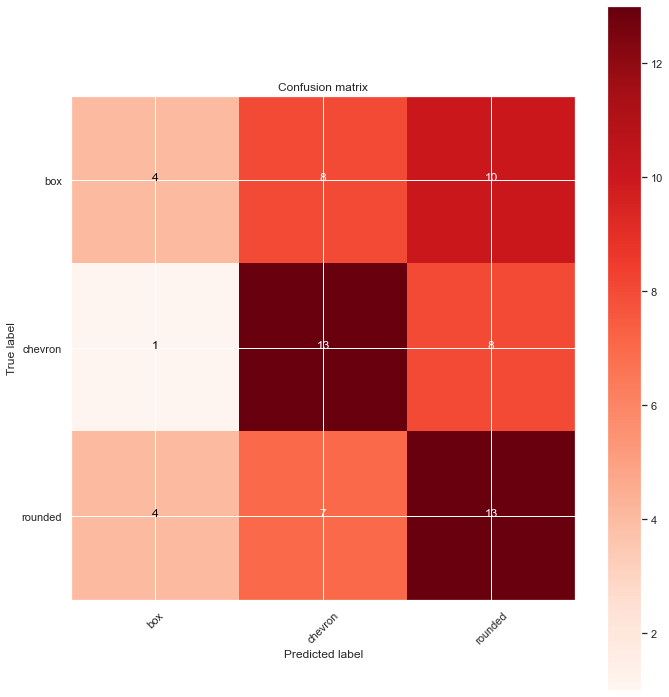

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_pred, y_test_pred)
from collections import Counter
Counter(y_test)
selected = np.unique(y_test)
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools




# clf = LazyClassifier(verbose=0,ignore_warnings=True)
# models, predictions = clf.fit(X_train_ft, X_test_ft, y_train, y_test)
# models



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)

title = 'Confusion matrix'
cmap = plt.cm.Reds

# Plot non-normalized confusion matrix.
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(selected))
plt.xticks(tick_marks, selected, rotation=45)
plt.yticks(tick_marks, selected)

# Print the support numbers inside the plot.
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()